## TP noté Machine Learning 1
## RAZAFIMANJATO Rina 

Nous travaillerons les données de production d'électricité au niveau national, fournies par ENEDIS. 

### 1- Importation des données

In [270]:
#importation des packages nécéssaires
import pandas
import numpy 
import matplotlib.pyplot as plt
import seaborn
seaborn.set_style("white")
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
from prince import CA

In [271]:
#Importation des données production

prod = pandas.read_csv("https://fxjollois.github.io/cours-2022-2023/insa-ms-esd--ml/Production.csv", delimiter = ";")
prod

,date,Filière de production,Plage de puissance injection,Total
0,2018-01-01,F0 : Total toutes filières,P0 : Total toutes puissances,282288260320
1,2018-01-01,F0 : Total toutes filières,P1 : ]0 - 3] kW,2081998048
2,2018-01-01,F0 : Total toutes filières,P2 : ]3 - 9] kW,375723566
3,2018-01-01,F0 : Total toutes filières,P3 : ]9 - 100] kW,1550524687
4,2018-01-01,F0 : Total toutes filières,P4 : ]100 - 250] kW,2660935897
...,...,...,...,...
71507,2021-06-30,F6 : Autres,P3 : ]9 - 100] kW,28401076
71508,2021-06-30,F6 : Autres,P4 : ]100 - 250] kW,10975153
71509,2021-06-30,F6 : Autres,P5 : ]250 - 1000] kW,364832
71510,2021-06-30,F6 : Autres,P6 : ]1000 - 12000] kW,200862197


In [272]:
#Création du tableau Filière x Plage

prod_bis = prod.groupby(["Filière de production", "Plage de puissance injection"]).sum().reset_index()
prod_bis.head(10)


,Filière de production,Plage de puissance injection,Total
0,F0 : Total toutes filières,P0 : Total toutes puissances,201671440167339
1,F0 : Total toutes filières,P1 : ]0 - 3] kW,4323949123451
2,F0 : Total toutes filières,P2 : ]3 - 9] kW,1779026997285
3,F0 : Total toutes filières,P3 : ]9 - 100] kW,7481266477411
4,F0 : Total toutes filières,P4 : ]100 - 250] kW,7118936005079
5,F0 : Total toutes filières,P5 : ]250 - 1000] kW,7830837315698
6,F0 : Total toutes filières,P6 : ]1000 - 12000] kW,154093981792875
7,F0 : Total toutes filières,P7 : > 12000 kW,19170934285758
8,F1 : Thermique non renouvelable,P0 : Total toutes puissances,21729654981106
9,F1 : Thermique non renouvelable,P1 : ]0 - 3] kW,0


In [273]:
#table de contingence des variables filière de production et plage de puissance

prod_ter = prod_bis.pivot_table(values = "Total", 
                                index = "Filière de production", 
                                columns = "Plage de puissance injection")
prod_ter

Plage de puissance injection,P0 : Total toutes puissances,P1 : ]0 - 3] kW,P2 : ]3 - 9] kW,P3 : ]9 - 100] kW,P4 : ]100 - 250] kW,P5 : ]250 - 1000] kW,P6 : ]1000 - 12000] kW,P7 : > 12000 kW
Filière de production,,,,,,,,
F0 : Total toutes filières,201671440167339,4323949123451,1779026997285,7481266477411,7118936005079,7830837315698,154093981792875,19170934285758
F1 : Thermique non renouvelable,21729654981106,0,0,4489910907,34990863851,320147541070,20750316610097,0
F2 : Bioénergies,19952056479844,0,0,76264753568,1310414248915,1987636688787,13696829708634,1065766611992
F3 : Hydraulique,17844828008687,1176845081782,826726587,154390338681,698910081378,4042092392803,10207449094436,768954053876
F4 : Eolien,105594991075978,192784643780,16948932,477988963,664358088,34064639174,90387663643792,14765138528467
F5 : Solaire,35924152364648,2721860689422,1599509385890,6666189941092,4773053922208,0,17688115590539,368672870059
F6 : Autres,644632635703,158638099,295575569,9195475791,2047306022,1810446002,485283892182,0


## 2- Lien entre filière de production et plage de puissance

Pour cette première partie, nous voulons voir si certaines filières sont liées à certaines plages, et inversement. Nous allons donc utiliser la table de contingence pour faire l'étude.

##### Description des données

Avant de commencer les études nous enlevons P0 et F0

In [274]:
prod_ter_bis= prod_ter.drop(index = ("F0 : Total toutes filières"),columns = "P0 : Total toutes puissances")
prod_ter_bis


Plage de puissance injection,P1 : ]0 - 3] kW,P2 : ]3 - 9] kW,P3 : ]9 - 100] kW,P4 : ]100 - 250] kW,P5 : ]250 - 1000] kW,P6 : ]1000 - 12000] kW,P7 : > 12000 kW
Filière de production,,,,,,,
F1 : Thermique non renouvelable,0,0,4489910907,34990863851,320147541070,20750316610097,0
F2 : Bioénergies,0,0,76264753568,1310414248915,1987636688787,13696829708634,1065766611992
F3 : Hydraulique,1176845081782,826726587,154390338681,698910081378,4042092392803,10207449094436,768954053876
F4 : Eolien,192784643780,16948932,477988963,664358088,34064639174,90387663643792,14765138528467
F5 : Solaire,2721860689422,1599509385890,6666189941092,4773053922208,0,17688115590539,368672870059
F6 : Autres,158638099,295575569,9195475791,2047306022,1810446002,485283892182,0


In [275]:
prod_ter_bis.describe()

Plage de puissance injection,P1 : ]0 - 3] kW,P2 : ]3 - 9] kW,P3 : ]9 - 100] kW,P4 : ]100 - 250] kW,P5 : ]250 - 1000] kW,P6 : ]1000 - 12000] kW,P7 : > 12000 kW
count,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00
mean,6.819415e+11,2.667748e+11,1.151835e+12,1.136680e+12,1.064292e+12,2.553594e+13,2.828089e+12
std,1.099126e+12,6.529040e+11,2.702129e+12,1.856700e+12,1.649034e+12,3.253582e+13,5.863171e+12
min,0.000000e+00,0.000000e+00,4.779890e+08,6.643581e+08,0.000000e+00,4.852839e+11,0.000000e+00
25%,3.965952e+07,4.237233e+06,5.666302e+09,1.028320e+10,9.873994e+09,1.107979e+13,9.216822e+10
50%,9.647164e+10,1.562623e+08,4.273011e+10,3.669505e+11,1.771061e+11,1.569247e+13,5.688135e+11
75%,9.308300e+11,6.939388e+08,1.348589e+11,1.157538e+12,1.570764e+12,1.998477e+13,9.915635e+11
max,2.721861e+12,1.599509e+12,6.666190e+12,4.773054e+12,4.042092e+12,9.038766e+13,1.476514e+13


La méthode que nous allons utiliser ici est l' analyse factorielle des correspondances. Cette méthode permet d'étudier des données présentées sous forme de tableau de contingence.

**Calcul de AFC**

In [276]:
ca = CA(n_components = 4)
ca.fit(prod_ter_bis)

CA(n_components=4)

Calcul des Valeurs propres

In [277]:

print(ca.eigenvalues_)
print(ca.total_inertia_)
print(ca.explained_inertia_)

[0.34708535009431046, 0.17257457478215008, 0.022330562945645557, 0.008858458343609864]
0.5508545740255112
[0.6300852647149595, 0.3132851807347574, 0.04053803671349997, 0.016081301238681574]


In [278]:
eig = pandas.DataFrame(
    { 
        "Dimension" : ["Dim" + str(x + 1) for x in range(4)],
        "Valeur propre": ca.eigenvalues_,
        "% variance expliquée": numpy.round(ca.explained_inertia_, 4) * 100,
        "% variance expliquée cumulée": numpy.round(numpy.cumsum(ca.explained_inertia_), 4) * 100,
    }
)
eig

,Dimension,Valeur propre,% variance expliquée,% variance expliquée cumulée
0,Dim1,0.347085,63.01,63.01
1,Dim2,0.172575,31.33,94.34
2,Dim3,0.022331,4.05,98.39
3,Dim4,0.008858,1.61,100.00


Pour les 2 premiers axes factoriels, nous avons 63% de variance expliquée pour le premier axe et 31% pour le 2 ème axe.

Avec les deux premiers axes, nous gardons 94% d'informations.

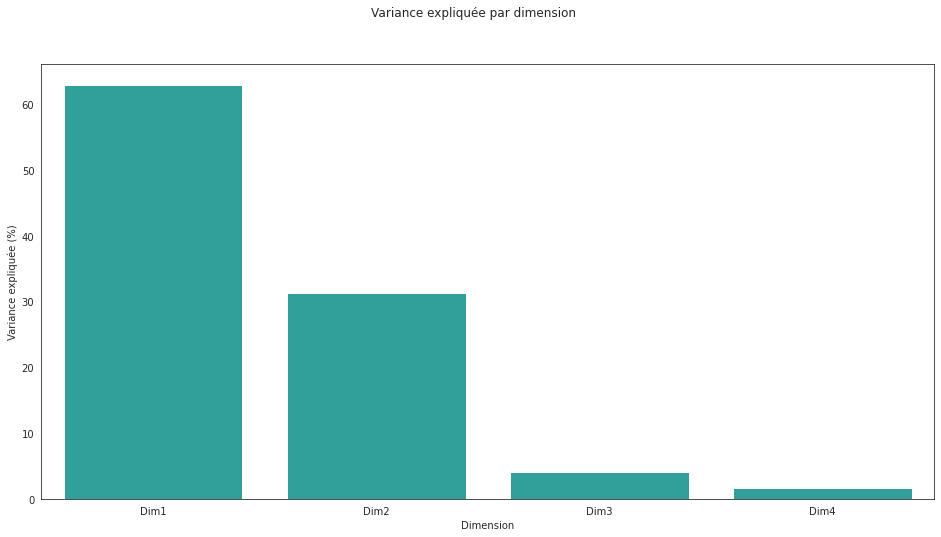

In [279]:
#Représentation graphique

plt.figure(figsize=(16, 8))
g_eig = seaborn.barplot(x = "Dimension", 
                        y = "% variance expliquée",
                        palette = ["lightseagreen"],
                        data = eig)
g_eig.set(ylabel = "Variance expliquée (%)")
g_eig.figure.suptitle("Variance expliquée par dimension")

plt.show()



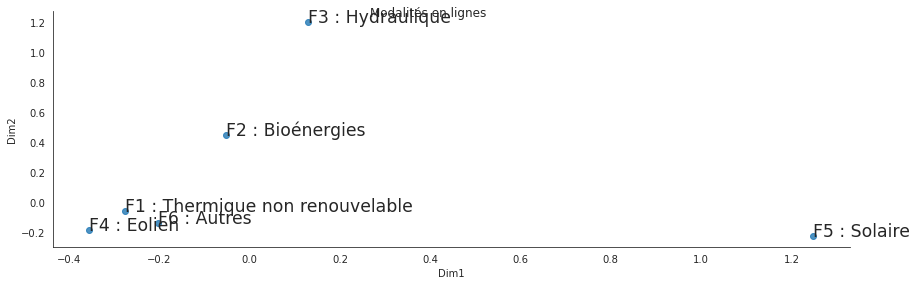

In [280]:
#Représentation des lignes

rowprod_ter_bis = ca.row_coordinates(prod_ter_bis).rename(columns = {0: "Dim1", 1: "Dim2"})
rowprod_ter_bis

g_row = seaborn.lmplot(x = "Dim1", y = "Dim2", data = rowprod_ter_bis, fit_reg = False, 
                       height = 4, aspect = 3)
g_row.fig.suptitle("Modalités en lignes")
for i in rowprod_ter_bis.index:
    plt.text(rowprod_ter_bis.loc[i].Dim1, rowprod_ter_bis.loc[i].Dim2, i, size = "xx-large")
plt.show()


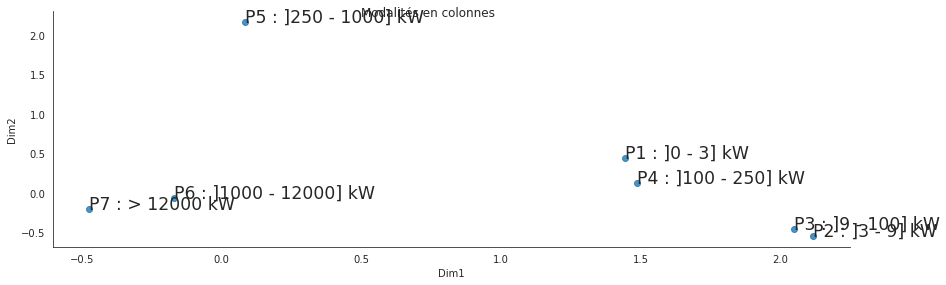

In [281]:
#representation des colonnes

colprod_ter_bis = ca.column_coordinates(prod_ter_bis).rename(columns = {0: "Dim1", 1: "Dim2"})
colprod_ter_bis 


g_col = seaborn.lmplot(x = "Dim1", y = "Dim2", data = colprod_ter_bis , fit_reg = False, 
                       height = 4, aspect = 3)
g_col.fig.suptitle("Modalités en colonnes")
for i in colprod_ter_bis .index:
    plt.text(colprod_ter_bis .loc[i].Dim1, colprod_ter_bis .loc[i].Dim2, i, size = "xx-large")
plt.show()

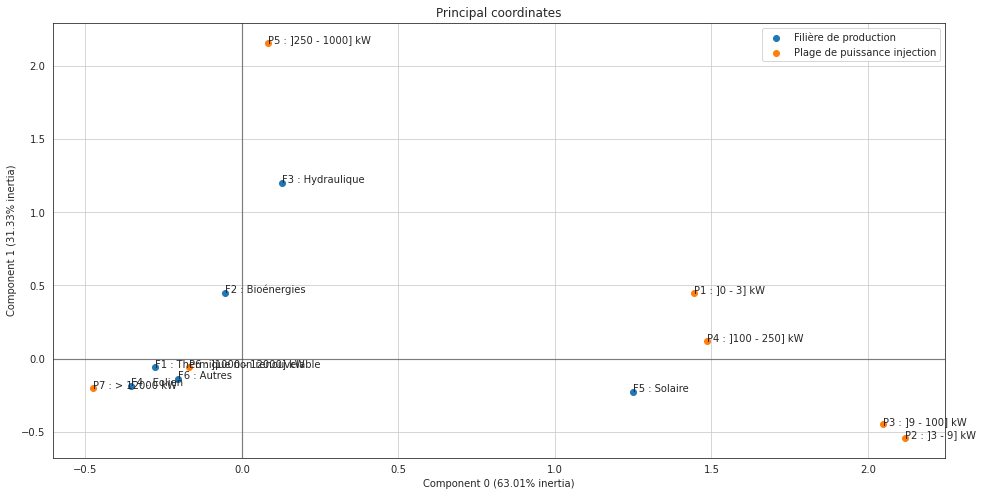

In [282]:
#representation simultannée

ca.plot_coordinates(prod_ter_bis,
                    figsize=(16, 8));

In [283]:
rowprod_ter_bis = ca.row_coordinates(prod_ter_bis)
colprod_ter_bis = ca.column_coordinates(prod_ter_bis)


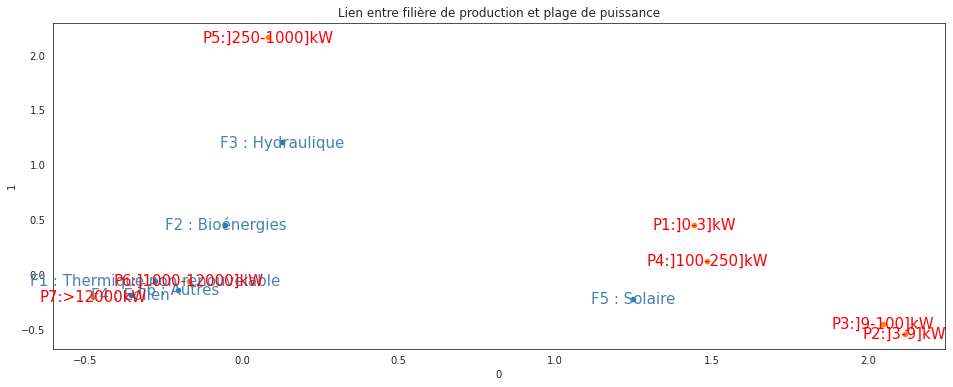

In [284]:
#Representation conjointe

plt.figure(figsize = (16, 6))

g = seaborn.scatterplot(x = 0, y = 1, data = rowprod_ter_bis)
for i in range(rowprod_ter_bis.shape[0]):
    plt.text(rowprod_ter_bis.iloc[i][0], rowprod_ter_bis.iloc[i][1], rowprod_ter_bis.index[i], 
             ha = "center", va = "center", fontsize = 15, color = "steelblue")
seaborn.scatterplot(x = 0, y = 1, data = colprod_ter_bis)
for i in range(colprod_ter_bis.shape[0]):
    plt.text(colprod_ter_bis.iloc[i][0], colprod_ter_bis.iloc[i][1], 
             colprod_ter_bis.index[i].replace(" ", ""), 
             ha = "center", va = "center", fontsize = 15, color = "red")

ax = plt.gca()
ax.set_title("Lien entre filière de production et plage de puissance")
plt.show()

###### Interpretation:
Ce graphique nous montre que :

-Les filières de productions F1, F4 et F6 sont associées à la plage de puisssance P6 et P7.

-Les filières F3, F2 sont associées à P5.

-La filière F5 est associée surtout aux plages de puissance P3 et P4

## 3- Analyse des jours de production

Dans cette partie, nous souhaitons analyser les jours de production en fonction :

-d'une part de la filière de production

-d'autre part de la plage de puissance


### 3-1 Description de la base Prod

Notre jeu de donnée contient 71512 observations et 4 variables dont 3 variables sont de type chaine de caractère et une variable de type entier.


In [285]:
prod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71512 entries, 0 to 71511
Data columns (total 4 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   date                          71512 non-null  object
 1   Filière de production         71512 non-null  object
 2   Plage de puissance injection  71512 non-null  object
 3   Total                         71512 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 2.2+ MB


In [286]:
print("Les valeurs uniques pour la filière de production sont:", prod["Filière de production"].unique())

print("Les valeurs uniques pour la Plage de puissance injection sont:",prod["Plage de puissance injection"].unique())

print ("Le nombre de valeur unique pour la variable date est",prod["date"].nunique())

Les valeurs uniques pour la filière de production sont: ['F0 : Total toutes filières' 'F1 : Thermique non renouvelable'
 'F2 : Bioénergies' 'F3 : Hydraulique' 'F4 : Eolien' 'F5 : Solaire'
 'F6 : Autres']
Les valeurs uniques pour la Plage de puissance injection sont: ['P0 : Total toutes puissances' 'P1 : ]0 - 3] kW' 'P2 : ]3 - 9] kW'
 'P3 : ]9 - 100] kW' 'P4 : ]100 - 250] kW' 'P5 : ]250 - 1000] kW'
 'P6 : ]1000 - 12000] kW' 'P7 : > 12000 kW']
Le nombre de valeur unique pour la variable date est 1277


### 3-2 Les jours de production en fonction de la filière de production

**Transformation de la base pour avoir en colonnes les filières**

Nous avons vu précédemment qu'il y a 1277 valeurs unique pour la variable date et 7 valeurs uniques pour la filière de production. 

Nous allons donc construire un dataframe de dimension (1277,7)

In [287]:

#séparation  des 7  filières de productions
F0 = prod.loc[(prod['Filière de production'] == 'F0 : Total toutes filières')]
F1 = prod.loc[(prod['Filière de production'] == 'F1 : Thermique non renouvelable')]
F2 = prod.loc[(prod['Filière de production'] == 'F2 : Bioénergies')]
F3 = prod.loc[(prod['Filière de production'] == 'F3 : Hydraulique')]
F4 = prod.loc[(prod['Filière de production'] == 'F4 : Eolien')]
F5 = prod.loc[(prod['Filière de production'] == 'F5 : Solaire')]
F6 = prod.loc[(prod['Filière de production'] == 'F6 : Autres')]

#group by date et Total
F0_bis = F0.groupby('date')['Total'].sum() 
F1_bis = F1.groupby('date')['Total'].sum() 
F2_bis = F2.groupby('date')['Total'].sum() 
F3_bis = F3.groupby('date')['Total'].sum() 
F4_bis= F4.groupby('date')['Total'].sum() 
F5_bis = F5.groupby('date')['Total'].sum() 
F6_bis= F6.groupby('date')['Total'].sum() 


In [288]:

#construction  d'un dataframe production 
production = pandas.DataFrame(columns= prod["Filière de production"].unique())

production["F0 : Total toutes filières"] = F0_bis.values
production['F1 : Thermique non renouvelable'] = F1_bis.values
production['F2 : Bioénergies'] = F2_bis.values
production['F3 : Hydraulique'] = F3_bis.values
production['F4 : Eolien'] = F4_bis.values
production['F5 : Solaire'] = F5_bis.values
production['F6 : Autres'] = F6_bis.values 

production


,F0 : Total toutes filières,F1 : Thermique non renouvelable,F2 : Bioénergies,F3 : Hydraulique,F4 : Eolien,F5 : Solaire,F6 : Autres
0,564576520488,76146900639,27768217561,30639122760,413098208346,13750516140,274492700
1,457806140758,77106461155,27083680968,31650813253,308415832159,10534966391,273888159
2,557855199033,76072066509,26358784789,30428250310,411147383935,10740327136,472407213
3,527961081935,76905187898,27558686960,27810887020,380749909236,11435260931,647552551
4,369308846739,77716243864,27664135409,27438797807,217707902255,15153702880,659582096
...,...,...,...,...,...,...,...
1272,218720253449,76115226,32835293673,31433364319,39327531477,111635692910,369990334
1273,195540110589,82892436,33665911876,29151523843,62346011761,66450873560,375847506
1274,200150134267,279041274,32981773987,31676043559,53728272750,78969564904,552609059
1275,226879536860,313504275,33545456341,31643294249,68810048566,89899569203,545465930


**Analyse descriptive de la base production**

In [289]:
production.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1277 entries, 0 to 1276
Data columns (total 7 columns):
 #   Column                           Non-Null Count  Dtype
---  ------                           --------------  -----
 0   F0 : Total toutes filières       1277 non-null   int64
 1   F1 : Thermique non renouvelable  1277 non-null   int64
 2   F2 : Bioénergies                 1277 non-null   int64
 3   F3 : Hydraulique                 1277 non-null   int64
 4   F4 : Eolien                      1277 non-null   int64
 5   F5 : Solaire                     1277 non-null   int64
 6   F6 : Autres                      1277 non-null   int64
dtypes: int64(7)
memory usage: 70.0 KB


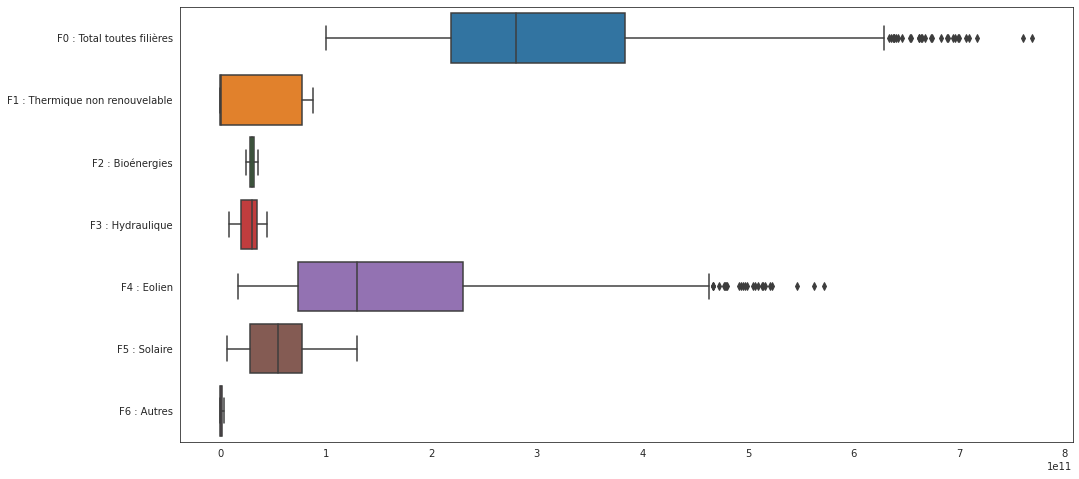

In [290]:
plt.figure(figsize = (16, 8))
seaborn.boxplot(data = production, orient = "h")
plt.show()

Ce graqhique nous montre que les variables ont des echelles très différentes

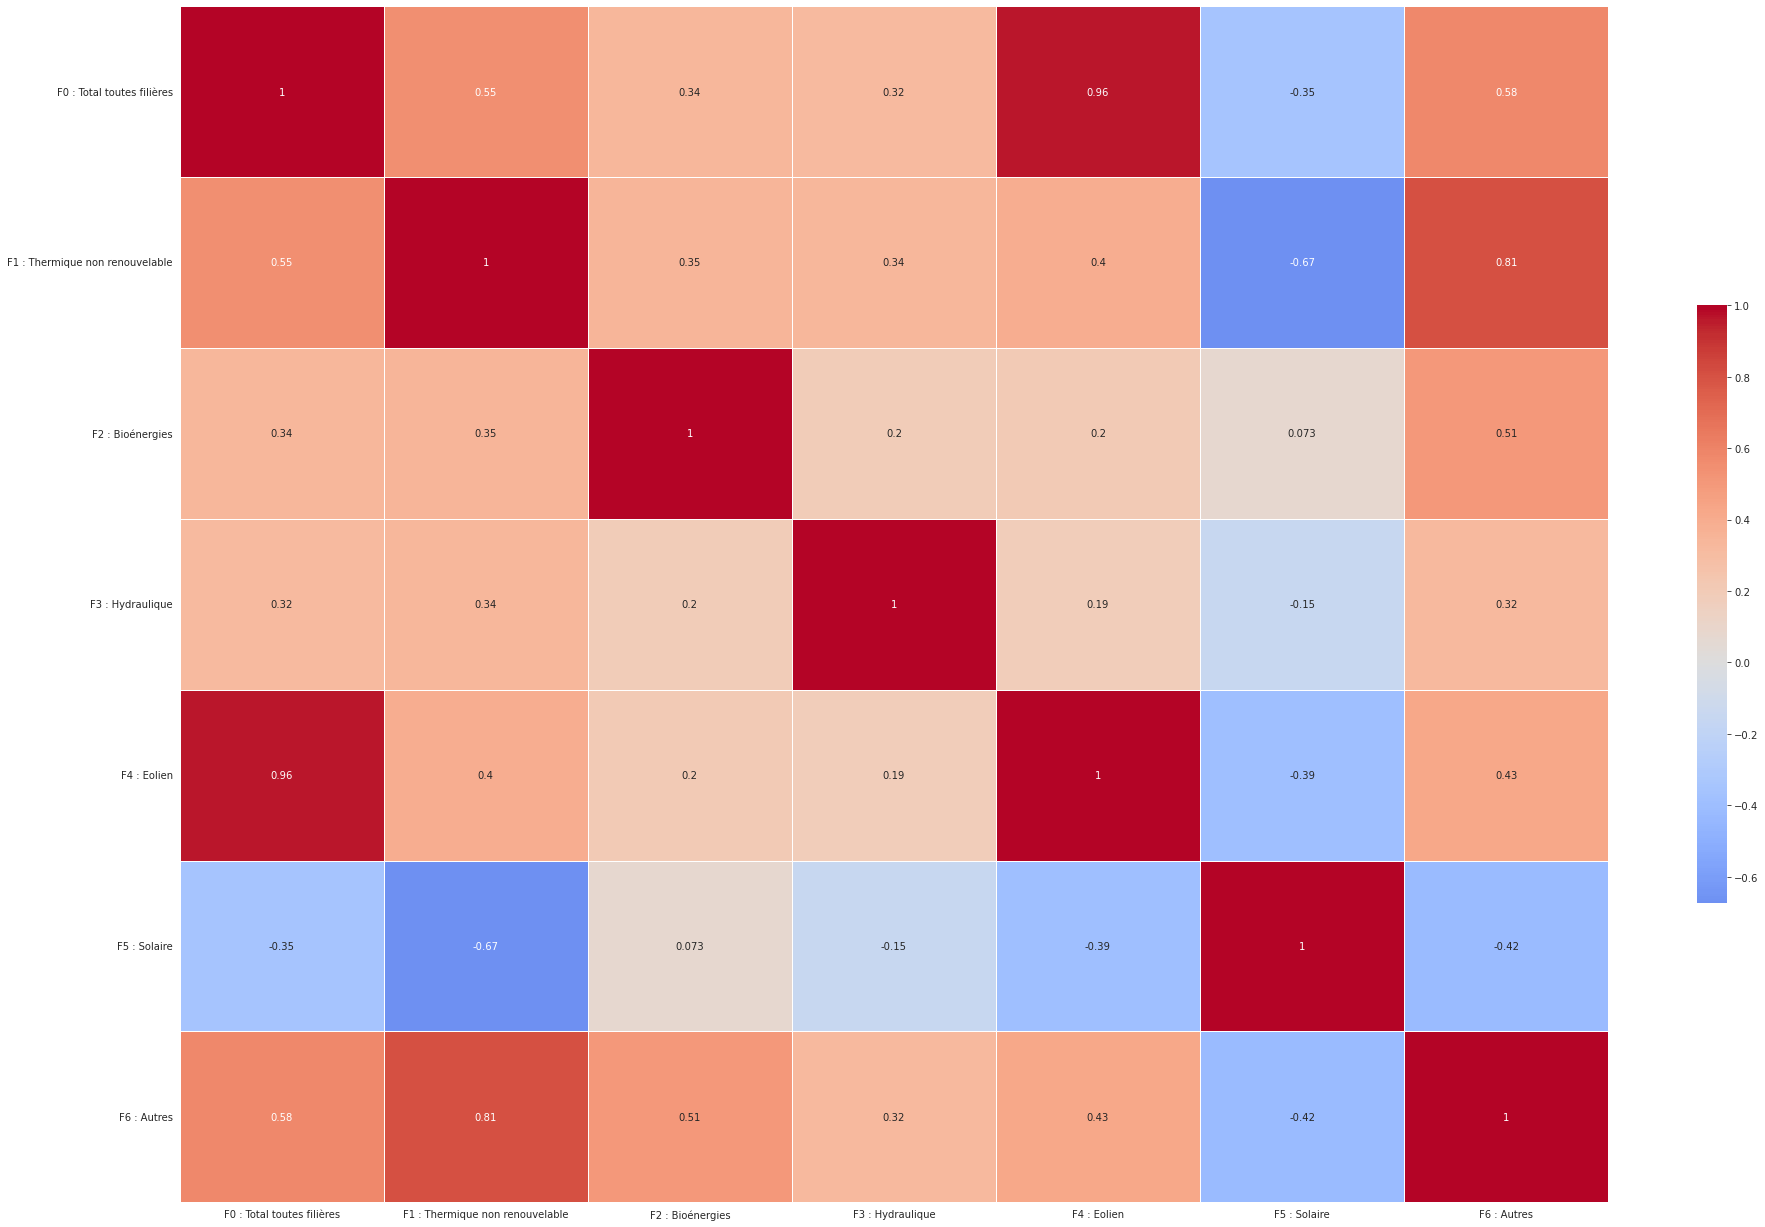

In [291]:
plt.figure(figsize = (30,10))
h = seaborn.heatmap(production.corr(), linewidths=.5, center = 0, cbar_kws={"shrink": .5}, cmap = 'coolwarm', annot = True)
h.figure.set_size_inches(32,22)
plt.show()

Nous observons à partir de ce graphique que lles pluparts des variables ne sont pas très corrélées entre eux. 

Nous remarquons par contre une forte correlation entre F4 et F0 avec un coefficient de correlation 0,96 et entre F6 et F1 avec un coefficient de 0.81.

**Réalisons un ACP**

Ici, nous avons des variables avec des échelles très différentes donc nous travaillerons avec un ACP normé

In [292]:
production_bis= StandardScaler().fit_transform(production)
production_bis= pandas.DataFrame(data =production_bis ,columns = production.columns)
production_bis

,F0 : Total toutes filières,F1 : Thermique non renouvelable,F2 : Bioénergies,F3 : Hydraulique,F4 : Eolien,F5 : Solaire,F6 : Autres
0,1.919761,1.101981,-0.894034,0.342969,2.114410,-1.459061,-0.692115
1,1.095331,1.126803,-1.191309,0.447672,1.221494,-1.573876,-0.692789
2,1.867862,1.100045,-1.506111,0.321145,2.097770,-1.566543,-0.471503
3,1.637034,1.121597,-0.985027,0.050264,1.838487,-1.541730,-0.276271
4,0.411998,1.142577,-0.939234,0.011755,0.447777,-1.408959,-0.262861
...,...,...,...,...,...,...,...
1272,-0.750775,-0.865833,1.306455,0.425168,-1.073765,2.036037,-0.585665
1273,-0.929761,-0.865658,1.667170,0.189012,-0.877423,0.422663,-0.579136
1274,-0.894164,-0.860584,1.370068,0.450284,-0.950930,0.869657,-0.382103
1275,-0.687773,-0.859692,1.614859,0.446894,-0.822286,1.259925,-0.390065


In [293]:
pca = PCA(n_components = 7) 
pca.fit(scale(production_bis))

PCA(n_components=7)

In [294]:
print(pca.explained_variance_)
print(pca.explained_variance_ratio_) 

[3.56668253e+00 1.14331667e+00 1.03071505e+00 8.23007192e-01
 3.07832083e-01 1.33617719e-01 3.14641472e-04]
[5.09127074e-01 1.63203051e-01 1.47129702e-01 1.17480387e-01
 4.39415748e-02 1.90732979e-02 4.49135830e-05]


In [295]:
eig = pandas.DataFrame(
    {
        "Dimension" : ["Dim" + str(x + 1) for x in range(7)], 
        "Valeur propre" : pca.explained_variance_,
        "% variance expliquée" : np.round(pca.explained_variance_ratio_ * 100),
        "% cum. var. expliquée" : np.round(np.cumsum(pca.explained_variance_ratio_) * 100)
    },
    columns = ["Dimension", "Valeur propre", "% variance expliquée", "% cum. var. expliquée"]
)
eig

,Dimension,Valeur propre,% variance expliquée,% cum. var. expliquée
0,Dim1,3.566683,51.0,51.0
1,Dim2,1.143317,16.0,67.0
2,Dim3,1.030715,15.0,82.0
3,Dim4,0.823007,12.0,94.0
4,Dim5,0.307832,4.0,98.0
5,Dim6,0.133618,2.0,100.0
6,Dim7,0.000315,0.0,100.0


Nous avons une variance expliquée de 51% pour le premier axe et de 16% pour le 2ème axe. On garde donc 67% de variance expliquée pour les deux premiers axes.

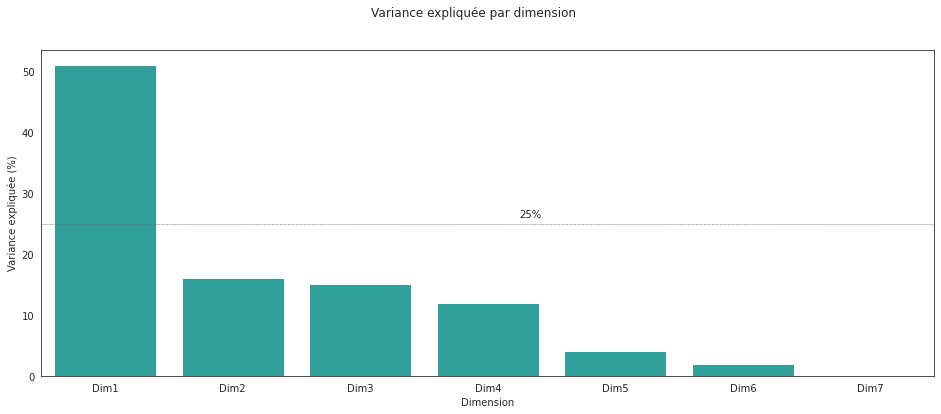

In [296]:
plt.figure(figsize=(16, 6))
g_eig = seaborn.barplot(x = "Dimension", 
                        y = "% variance expliquée",
                        palette = ["lightseagreen"],
                        data = eig)
plt.text(3.25, 26, "25%")
plt.axhline(y = 25, linewidth = .5, color = "dimgray", linestyle = "--") # 25 = 100 / 4 (nb dimensions)
g_eig.set(ylabel = "Variance expliquée (%)")
g_eig.figure.suptitle("Variance expliquée par dimension")

plt.show()

In [297]:
#représentation des variables 

pandas.DataFrame(pca.components_.T, columns=['PC'+str(i) for i in range(1, 8)], index=production_bis.columns[:7])



,PC1,PC2,PC3,PC4,PC5,PC6,PC7
F0 : Total toutes filières,0.457267,-0.055247,0.483102,0.069613,0.083288,-0.187243,0.712478
F1 : Thermique non renouvelable,0.452756,-0.068922,-0.406607,-0.137194,0.143504,-0.733933,-0.216471
F2 : Bioénergies,0.252473,0.718527,0.017206,-0.323464,-0.560175,0.033263,-0.012157
F3 : Hydraulique,0.239962,0.253055,-0.208818,0.905004,-0.091046,0.068486,-0.052577
F4 : Eolien,0.402433,-0.210420,0.597660,0.037187,-0.071250,0.106874,-0.647064
F5 : Solaire,-0.322666,0.575681,0.369723,0.079799,0.542550,-0.321177,-0.154595
F6 : Autres,0.445565,0.190248,-0.251973,-0.211941,0.592408,0.553091,-0.003548


In [298]:
coordvar = pca.components_.T * np.sqrt(pca.explained_variance_)
coordvar_df= pandas.DataFrame(coordvar, columns=['PC'+str(i) for i in range(1, 8)], index=production.columns[:7])
coordvar_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
F0 : Total toutes filières,0.863580,-0.059074,0.490465,0.063153,0.046211,-0.068444,0.012638
F1 : Thermique non renouvelable,0.855059,-0.073695,-0.412804,-0.124462,0.079620,-0.268280,-0.003840
F2 : Bioénergies,0.476813,0.768292,0.017468,-0.293446,-0.310800,0.012159,-0.000216
F3 : Hydraulique,0.453185,0.270581,-0.212000,0.821018,-0.050515,0.025034,-0.000933
F4 : Eolien,0.760022,-0.224994,0.606769,0.033736,-0.039532,0.039066,-0.011478
F5 : Solaire,-0.609377,0.615552,0.375358,0.072394,0.301021,-0.117402,-0.002742
F6 : Autres,0.841478,0.203425,-0.255813,-0.192273,0.328683,0.202175,-0.000063


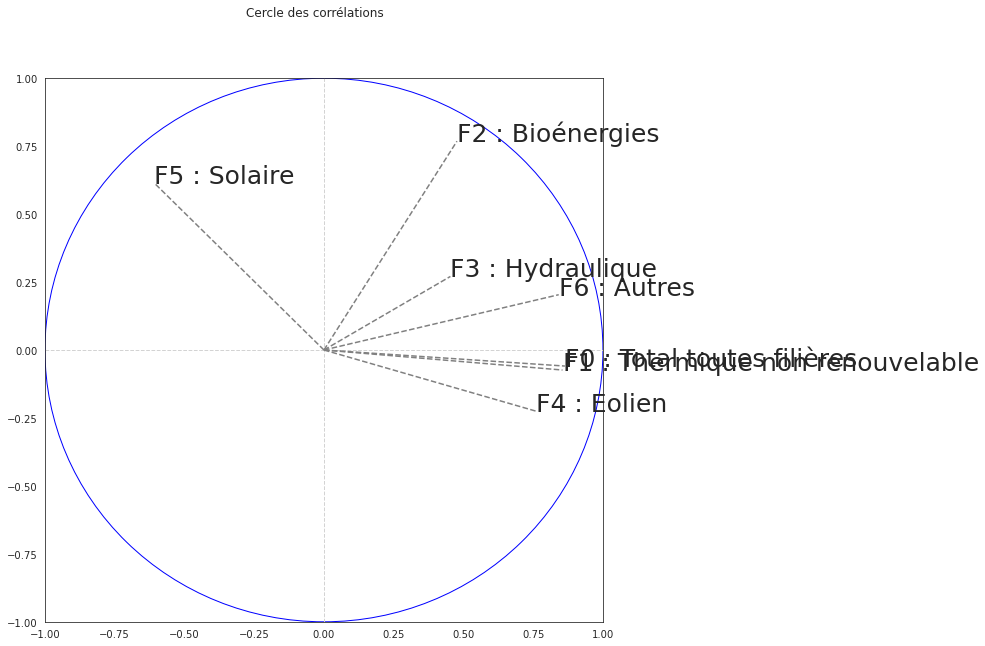

In [299]:
fig, axes = plt.subplots(figsize = (10, 10))
fig.suptitle("Cercle des corrélations")
axes.set_xlim(-1, 1)
axes.set_ylim(-1, 1)
axes.axvline(x = 0, color = 'lightgray', linestyle = '--', linewidth = 1)
axes.axhline(y = 0, color = 'lightgray', linestyle = '--', linewidth = 1)
for j in range(7):
    axes.text(coordvar_df["PC1"][j],coordvar_df["PC2"][j], coordvar_df.index[j], size = 25)
    axes.plot([0,coordvar_df["PC1"][j]], [0,coordvar_df["PC2"][j]], color = "gray", linestyle = 'dashed')
plt.gca().add_artist(plt.Circle((0,0),1,color='blue',fill=False))

plt.show()

**Interpretation**

L'axe des abscisses représente le premier axe d'inertie.

-F0 est corrélée au premier axe factoriel du cercle de corrélation.

-Les variables F3,F6,F1 et F4  egalement sont proches du premier axe et elles sont corrélées positivement. 

-F2 et F5 dont plus corrélées au 2 ème axe. F5 est corrélées négativement et F2 est corélées positivement.

-F3 est faiblement corrélée aux deux axes.




In [300]:
data_pca = pca.transform(production_bis[production_bis.columns[:7]])
data_pca_df = pandas.DataFrame({
    "Dim1" : data_pca[:,0], 
    "Dim2" : data_pca[:,1], 
    "date" : prod["date"].unique()
})
data_pca_df.head() 

/home/razafimanjato/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


,Dim1,Dim2,date
0,2.246669,-2.154152,2018-01-01
1,1.508401,-2.175757,2018-01-02
2,2.188573,-2.612871,2018-01-03
3,2.133976,-2.189752,2018-01-04
4,0.989093,-1.728741,2018-01-05


**Plan factoriel**

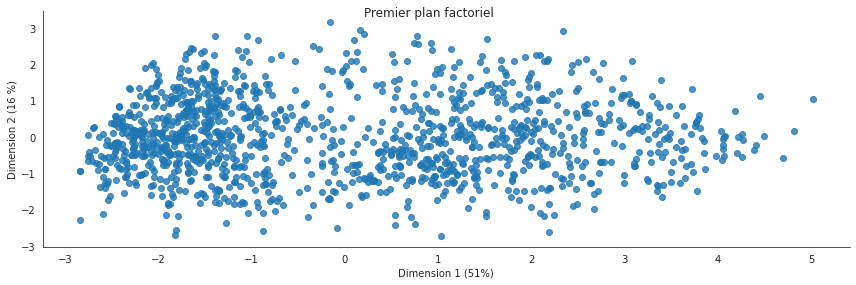

In [301]:
g_pca = seaborn.lmplot(x = "Dim1", y = "Dim2", data = data_pca_df, fit_reg = False, 
                       height = 4, aspect = 3)
g_pca.set(xlabel = "Dimension 1 (51%)", ylabel = "Dimension 2 (16 %)")
g_pca.fig.suptitle("Premier plan factoriel")

plt.show()

Ce graphique nous montre que les points sont beaucoup plus centrés à gauche. Et les autres points sont repartis à droite du graphique.

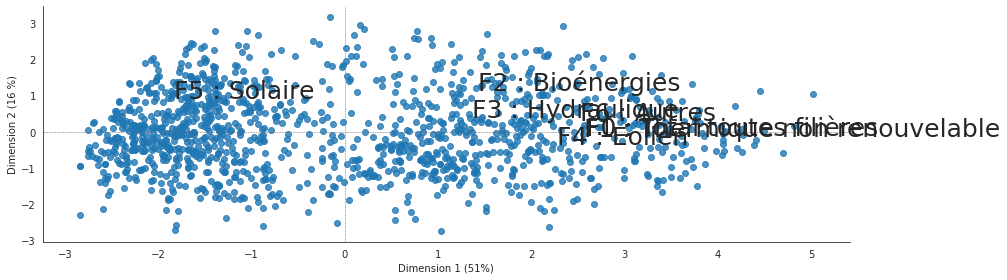

In [302]:

g_pca = seaborn.lmplot(x = "Dim1", y = "Dim2", data = data_pca_df, fit_reg = False, 
                       height = 4, aspect = 3)
g_pca.set(xlabel = "Dimension 1 (51%)", ylabel = "Dimension 2 (16 %)")
#g_pca.fig.suptitle("Premier plan factoriel")
axes = g_pca.axes[0,0]
for j in range(7):
    axes.text(coordvar_df["PC1"][j] * 3 + data_pca_df.Dim1.mean(),
              coordvar_df["PC2"][j] * 1.5 + data_pca_df.Dim2.mean(), 
              coordvar_df.index[j], size = 25)
plt.axvline(x = data_pca_df.Dim1.mean(), linewidth = .5, color = "dimgray", linestyle = "--")
plt.axhline(y = data_pca_df.Dim2.mean(), linewidth = .5, color = "dimgray", linestyle = "--")

plt.show()

Ce graphique nous montre que nous pouvons par exemple avoir deux groupes.

Le premier est celui qui est à gauche qui est la variable F5: solaire
    
Le deuxieème est celui qui est à droite qui est les variables F0 F1, F2, F3, F4, F6.

**ACP sans F0 et comparaison selon les mois**

Nous allons maintenant travailler sans la variable F0. 

Pour avoir une vision plus claire des groupes et une bonne interpretation, nous  allons  également comparer selon les mois.


**Création d'un array:**  Janvier, Février, Mars, Avril, Mai, Juin, Juillet, Aout, Septembre, Octobre, Novrembre, Décembre.


In [303]:

prod["date"] = pandas.to_datetime(prod["date"], dayfirst = True )
print(prod["date"])


prod["year"] = prod["date"].dt.year
prod["month"] = prod["date"].dt.month 
prod_month = prod["month"]
prod_year = prod["year"]
prod_month = prod.groupby('date')['month'].sum()
print(prod_month.unique())
print(prod_year.unique())


0       2018-01-01
1       2018-01-01
2       2018-01-01
3       2018-01-01
4       2018-01-01
           ...    
71507   2021-06-30
71508   2021-06-30
71509   2021-06-30
71510   2021-06-30
71511   2021-06-30
Name: date, Length: 71512, dtype: datetime64[ns]
[ 56 112 168 224 280 336 392 448 504 560 616 672]
[2018 2019 2020 2021]


In [304]:
prod_month = prod_month.replace([56],"Janvier")
prod_month = prod_month.replace([112],"Février")
prod_month = prod_month.replace([168],"Mars")
prod_month = prod_month.replace([224],"Avril")
prod_month = prod_month.replace([280],"Mai")
prod_month = prod_month.replace([336],"Juin")
prod_month = prod_month.replace([392],"Juillet")
prod_month =prod_month.replace([448],"Août")
prod_month = prod_month.replace([504],"Septembre")
prod_month =prod_month.replace([560],"Octobre")
prod_month = prod_month.replace([616],"Novembre")
prod_month = prod_month.replace([672],"Décembre")

In [305]:
month= np.array(prod_month)
month

array(['Janvier', 'Janvier', 'Janvier', ..., 'Juin', 'Juin', 'Juin'],
      dtype=object)

**ACP sans la variable F0**

In [306]:
production_bis2 = production_bis.drop(["F0 : Total toutes filières"], axis = 1)

In [307]:
pca_sansF0 = PCA(n_components = 6)
pca_sansF0.fit(scale(production_bis2 ))



PCA(n_components=6)

In [308]:
print(pca_sansF0.explained_variance_)
print(pca_sansF0.explained_variance_ratio_) 

[2.90932702 1.14210156 0.83132791 0.69456381 0.30316123 0.12422067]
[0.48450813 0.1902012  0.13844615 0.11566998 0.0504873  0.02068723]


In [309]:
eigBis = pandas.DataFrame(
    {
        "Dimension" : ["Dim" + str(x + 1) for x in range(6)], 
        "Valeur propre" : pca_sansF0.explained_variance_,
        "% variance expliquée" : np.round(pca_sansF0.explained_variance_ratio_ * 100),
        "% cum. var. expliquée" : np.round(np.cumsum(pca_sansF0.explained_variance_ratio_) * 100)
    },
    columns = ["Dimension", "Valeur propre", "% variance expliquée", "% cum. var. expliquée"]
)
eigBis

,Dimension,Valeur propre,% variance expliquée,% cum. var. expliquée
0,Dim1,2.909327,48.0,48.0
1,Dim2,1.142102,19.0,67.0
2,Dim3,0.831328,14.0,81.0
3,Dim4,0.694564,12.0,93.0
4,Dim5,0.303161,5.0,98.0
5,Dim6,0.124221,2.0,100.0


In [310]:
coordvar_sansF0 = pca_sansF0.components_.T * np.sqrt(pca_sansF0.explained_variance_)
coordvar_df_sansF0 = pandas.DataFrame(coordvar_sansF0, columns=['PC'+str(i) for i in range(1, 7)], index=production_bis2.columns[:6])
coordvar_df_sansF0 

,PC1,PC2,PC3,PC4,PC5,PC6
F1 : Thermique non renouvelable,0.913355,-0.116908,-0.022511,-0.277139,0.062201,-0.267802
F2 : Bioénergies,0.494018,0.761670,-0.288413,-0.023958,-0.304323,0.014869
F3 : Hydraulique,0.474758,0.250275,0.833003,0.128885,-0.043498,0.018795
F4 : Eolien,0.621556,-0.174848,-0.191106,0.738651,0.025704,-0.033051
F5 : Solaire,-0.662711,0.652122,-0.003366,0.169715,0.300946,-0.130197
F6 : Autres,0.883257,0.172686,-0.131197,-0.161752,0.336984,0.184079


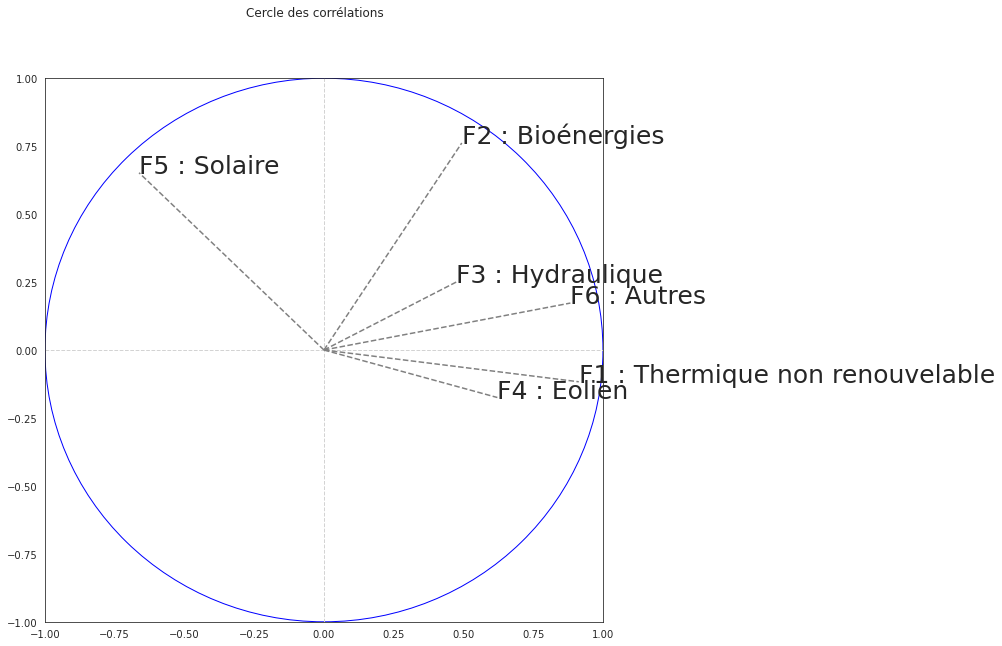

In [311]:
fig, axes = plt.subplots(figsize = (10, 10))
fig.suptitle("Cercle des corrélations")
axes.set_xlim(-1, 1)
axes.set_ylim(-1, 1)
axes.axvline(x = 0, color = 'lightgray', linestyle = '--', linewidth = 1)
axes.axhline(y = 0, color = 'lightgray', linestyle = '--', linewidth = 1)
for j in range(6):
    axes.text(coordvar_df_sansF0["PC1"][j],coordvar_df_sansF0["PC2"][j], coordvar_df_sansF0.index[j], size = 25)
    axes.plot([0,coordvar_df_sansF0["PC1"][j]], [0,coordvar_df_sansF0["PC2"][j]], color = "gray", linestyle = 'dashed')
plt.gca().add_artist(plt.Circle((0,0),1,color='blue',fill=False))

plt.show()

Nous pouvons dire les mêmes interprétations que le cercle de corrélation précédent.

In [312]:
data_pca_sansF0 = pca_sansF0.transform(production_bis2[production_bis2.columns[:6]])
data_pca_df_sansF0 = pandas.DataFrame({
    "Dim1" : data_pca_sansF0[:,0], 
    "Dim2" : data_pca_sansF0[:,1], 
    "month" : month
})
data_pca_df_sansF0.head() 

/home/razafimanjato/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


,Dim1,Dim2,month
0,1.405604,-2.025521,Janvier
1,1.080816,-2.139668,Janvier
2,1.371153,-2.493871,Janvier
3,1.455192,-2.099173,Janvier
4,0.917548,-1.767132,Janvier


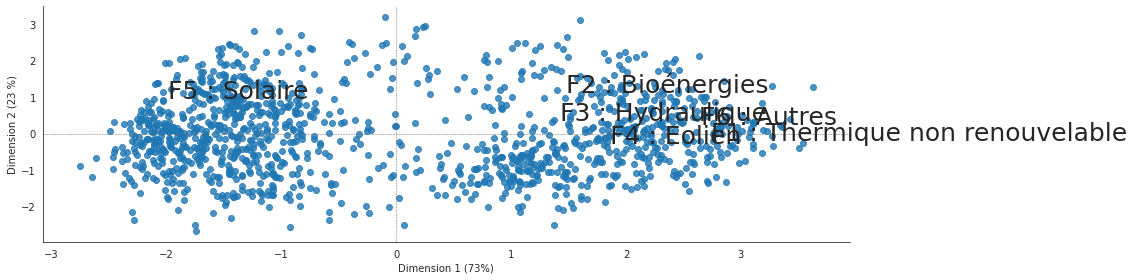

In [313]:
g_pca_sansF0 = seaborn.lmplot(x = "Dim1", y = "Dim2", data = data_pca_df_sansF0, fit_reg = False, 
                       height = 4, aspect = 3)
g_pca_sansF0.set(xlabel = "Dimension 1 (73%)", ylabel = "Dimension 2 (23 %)")
#g_pca.fig.suptitle("Premier plan factoriel")
axes = g_pca_sansF0.axes[0,0]
for j in range(6):
    axes.text(coordvar_df_sansF0["PC1"][j] * 3 + data_pca_df_sansF0.Dim1.mean(),
              coordvar_df_sansF0["PC2"][j] * 1.5 + data_pca_df_sansF0.Dim2.mean(), 
              coordvar_df_sansF0.index[j], size = 25)
plt.axvline(x = data_pca_df_sansF0.Dim1.mean(), linewidth = .5, color = "dimgray", linestyle = "--")
plt.axhline(y = data_pca_df_sansF0.Dim2.mean(), linewidth = .5, color = "dimgray", linestyle = "--")

plt.show()

Sans la variable F0, nous pouvons facilement voir les deux groupes. 

**Analyse selon les mois**

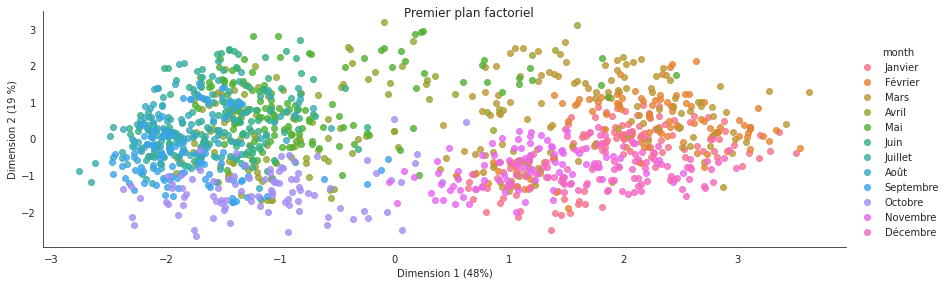

In [314]:
g_pca_month = seaborn.lmplot(x = "Dim1", y = "Dim2", hue = "month", data = data_pca_df_sansF0, fit_reg = False, 
                       height = 4, aspect = 3)
g_pca_month.set(xlabel = "Dimension 1 (48%)", ylabel = "Dimension 2 (19 %)")
g_pca_month.fig.suptitle("Premier plan factoriel")

plt.show()


Nous pouvons remarquer dans ce graphe que pour chaque mois, les points sont assez regroupés entre eux.

Sauf pour le mois d'avril qui a les points un peu partout du plan factoriel. 


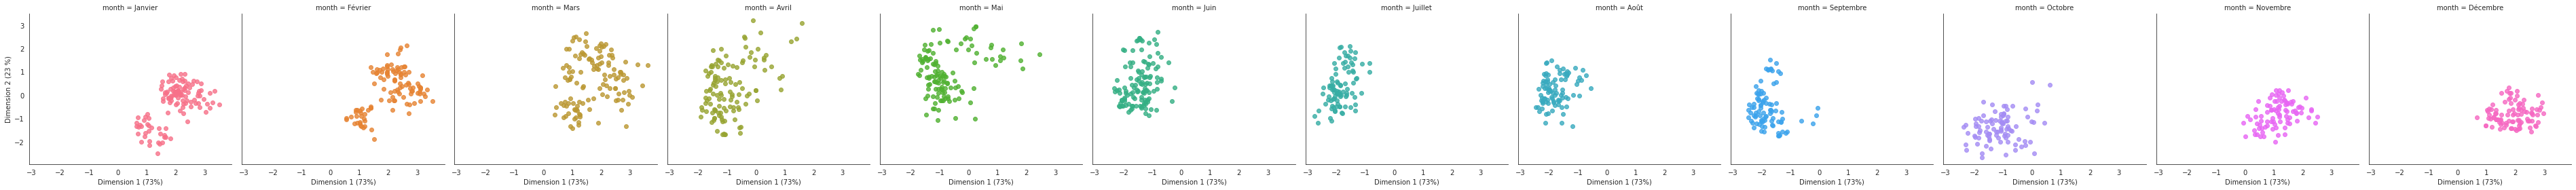

In [315]:

g_pca2_month = seaborn.lmplot(x = "Dim1", y = "Dim2", hue = "month", col = "month", 
                        data = data_pca_df_sansF0, fit_reg = False,
                        height = 4, aspect = 1.1)
g_pca2_month.set(xlabel = "Dimension 1 (73%)", ylabel = "Dimension 2 (23 %)")
g_pca.fig.suptitle("Premier plan factoriel")

plt.show()

Ce graphique nous montre par exemple que pour les mois de Janvier, Fevrier,Juin, Juillet, Aout, septembre, novembre, décembre; les points sont très regroupées entre eux.

Les mois de Mars, avril, mais; les points sont assez éloignés

**Classification avec CAH**

Dans cette partie, nous allos distinguer le nombre de classe.

In [316]:
hac = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
hac.fit(scale(production_bis))

AgglomerativeClustering(distance_threshold=0, n_clusters=None)

In [317]:


def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_, counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

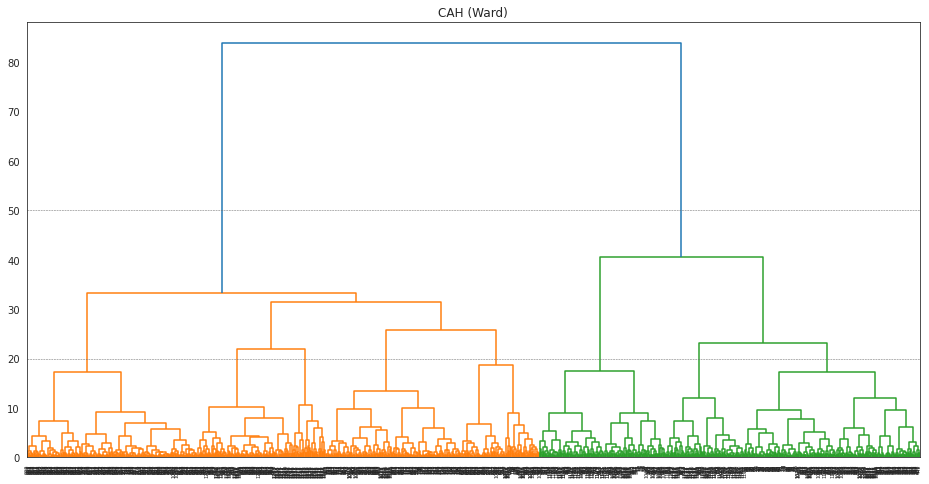

In [318]:
plt.figure(figsize = (16, 8))
plt.title("CAH (Ward)")
plot_dendrogram(hac)
plt.axhline(y = 50, linewidth = .5, color = "dimgray", linestyle = "--")
plt.axhline(y = 20, linewidth = .5, color = "dimgray", linestyle = "--")
plt.show()

**Interpretation**

Par ce graphe nous pouvons prendre soit 2 classes soit 3 classes soit 7 classes par exemple.

### 3-2 Les jours de production en fonction de la puissance injection

Nous avons vu précédemment qu'il y a 1277 valeurs unique pour la variable date et 8 valeurs uniques pour la puissance injection. 

Nous allons donc construire un dataframe de dimension (1277,8)

In [319]:
puissance = pandas.DataFrame(columns= prod["Plage de puissance injection"].unique())

**Construction de la base dont les variables sont les puissance injection**

In [320]:
P0 = prod.loc[(prod['Plage de puissance injection'] == 'P0 : Total toutes puissances')]
P1 =prod.loc[(prod['Plage de puissance injection'] == 'P1 : ]0 - 3] kW')]
P2 = prod.loc[(prod['Plage de puissance injection'] == 'P2 : ]3 - 9] kW')]
P3 = prod.loc[(prod['Plage de puissance injection'] == 'P3 : ]9 - 100] kW')]
P4 = prod.loc[(prod['Plage de puissance injection'] == 'P4 : ]100 - 250] kW')]
P5 =prod.loc[(prod['Plage de puissance injection'] == 'P5 : ]250 - 1000] kW')]
P6 = prod.loc[(prod['Plage de puissance injection'] == 'P6 : ]1000 - 12000] kW')]
P7 = prod.loc[(prod['Plage de puissance injection'] == 'P7 : > 12000 kW')]


In [321]:
puissance['P0 : Total toutes puissances'] = P0["Total"].values
puissance['P1 : ]0 - 3] kW'] = P1["Total"].values
puissance['P2 : ]3 - 9] kW'] = P2["Total"].values
puissance['P3 : ]9 - 100] kW'] = P3["Total"].values
puissance['P4 : ]100 - 250] kW'] = P4["Total"].values
puissance['P5 : ]250 - 1000] kW'] = P5["Total"].values
puissance['P6 : ]1000 - 12000] kW'] = P6["Total"].values
puissance['P7 : > 12000 kW'] = P7["Total"].values

In [322]:
sum_puissance_0 = P0.groupby('date')['Total'].sum() 
sum_puissance_1 = P1.groupby('date')['Total'].sum() 
sum_puissance_2 = P2.groupby('date')['Total'].sum() 
sum_puissance_3 = P3.groupby('date')['Total'].sum() 
sum_puissance_4 = P4.groupby('date')['Total'].sum() 
sum_puissance_5 = P5.groupby('date')['Total'].sum() 
sum_puissance_6 = P6.groupby('date')['Total'].sum() 
sum_puissance_7 = P7.groupby('date')['Total'].sum() 


In [323]:
puis = pandas.DataFrame(columns= prod["Plage de puissance injection"].unique())

In [324]:
puis['P0 : Total toutes puissances'] = sum_puissance_0.values
puis['P1 : ]0 - 3] kW'] = sum_puissance_1.values
puis['P2 : ]3 - 9] kW'] = sum_puissance_2.values
puis['P3 : ]9 - 100] kW'] = sum_puissance_3.values
puis['P4 : ]100 - 250] kW'] = sum_puissance_4.values
puis['P5 : ]250 - 1000] kW'] = sum_puissance_5.values
puis['P6 : ]1000 - 12000] kW'] = sum_puissance_6.values 
puis['P7 : > 12000 kW'] = sum_puissance_6.values 

In [325]:
puis.head(20)

,P0 : Total toutes puissances,P1 : ]0 - 3] kW,P2 : ]3 - 9] kW,P3 : ]9 - 100] kW,P4 : ]100 - 250] kW,P5 : ]250 - 1000] kW,P6 : ]1000 - 12000] kW,P7 : > 12000 kW
0,564501359124,3764422595,751339404,3099141728,5318157736,12219326431,482534608372,482534608372
1,457733635093,3700987616,606425784,2582852185,4929994741,12171735340,390400556085,390400556085
2,557774425834,3611349554,663617961,2758104129,4795664355,11329664600,478482660748,478482660748
3,527885852037,3550636869,581924473,2476700390,4550426680,11058179275,454504620194,454504620194
4,369234165882,3704064570,774651145,3146382744,5061392603,11384061506,310413147984,310413147984
5,234470373992,3608202275,632915524,2662624212,4828082844,11684042361,195486343179,195486343179
6,503248747652,3549430300,496018714,2187279438,4573386161,11994970709,433158315456,433158315456
7,317636484282,3720061999,703830042,2893237805,5043325104,12168282184,265978562160,265978562160
8,273963411141,3794267664,791846466,3237380501,5466151744,12781789121,226469012721,226469012721
9,265848083814,4180936009,1030263977,4049866716,6115166317,13279933400,217073312206,217073312206


puis est notre base de donnéede plage de puissance injection.
Une observation correspond à un jour.

**Analyse descriptive de la base puis**

In [326]:
puis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1277 entries, 0 to 1276
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   P0 : Total toutes puissances  1277 non-null   int64
 1   P1 : ]0 - 3] kW               1277 non-null   int64
 2   P2 : ]3 - 9] kW               1277 non-null   int64
 3   P3 : ]9 - 100] kW             1277 non-null   int64
 4   P4 : ]100 - 250] kW           1277 non-null   int64
 5   P5 : ]250 - 1000] kW          1277 non-null   int64
 6   P6 : ]1000 - 12000] kW        1277 non-null   int64
 7   P7 : > 12000 kW               1277 non-null   int64
dtypes: int64(8)
memory usage: 79.9 KB


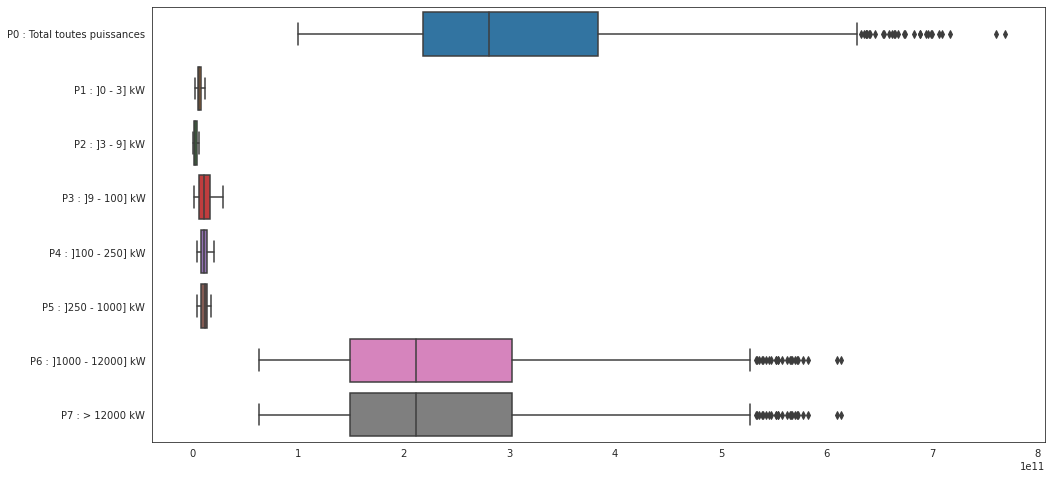

In [327]:
plt.figure(figsize = (16, 8))
seaborn.boxplot(data = puis, orient = "h")
plt.show()

Ce graqhique nous montre que les variables ont des echelles très différentes

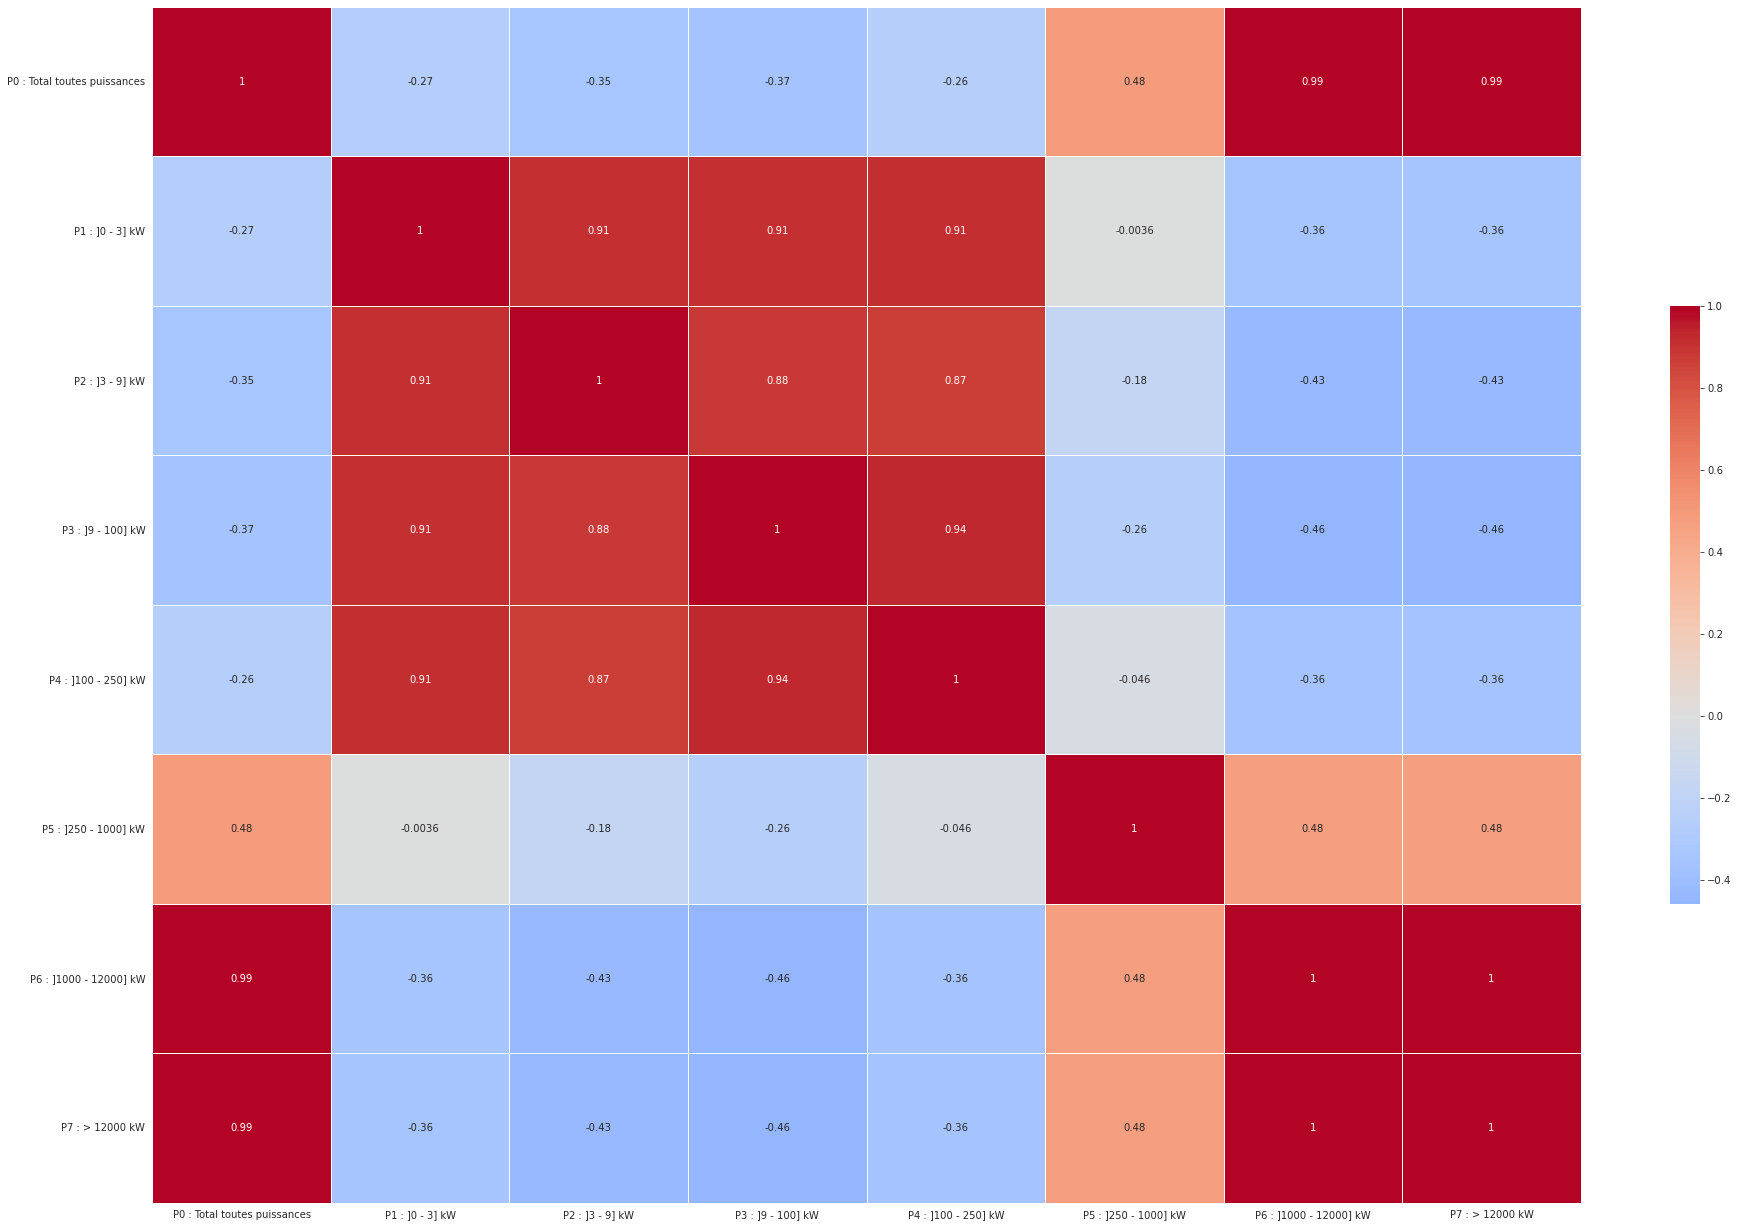

In [328]:
plt.figure(figsize = (30,10))
h = seaborn.heatmap(puis.corr(), linewidths=.5, center = 0, cbar_kws={"shrink": .5}, cmap = 'coolwarm', annot = True)
h.figure.set_size_inches(32,22)
plt.show()

Ce graphe nous montre que quelques variables sont fortement corrélées entre eux.

Par exemple:

-La variable P4 est fortement corrélées avec P1, P2, P3.

-La variable P2 est fortement corrélées avec P1.

**Réalisons un ACP**


Ici, nous avons des variables avec des échelles très différentes donc nous travaillerons avec un ACP normé.


**ACP sans la variable P0**

Nous travaillerons également sans la variable P0.

In [329]:
puis_bis= StandardScaler().fit_transform(puis)


In [330]:
puis_bis = pandas.DataFrame(data = puis_bis,columns = puis.columns)


In [331]:
#suppression de la variable P0

puis_bis2 = puis_bis.drop("P0 : Total toutes puissances", axis=1)
puis_bis2

,P1 : ]0 - 3] kW,P2 : ]3 - 9] kW,P3 : ]9 - 100] kW,P4 : ]100 - 250] kW,P5 : ]250 - 1000] kW,P6 : ]1000 - 12000] kW,P7 : > 12000 kW
0,-1.373049,-1.374113,-1.359668,-1.540858,0.342860,2.117317,2.117317
1,-1.403873,-1.479181,-1.445577,-1.647714,0.327842,1.310830,1.310830
2,-1.447429,-1.437714,-1.416415,-1.684693,0.062121,2.081848,2.081848
3,-1.476930,-1.496945,-1.463240,-1.752204,-0.023548,1.871959,1.871959
4,-1.402378,-1.357211,-1.351807,-1.611542,0.079286,0.610668,0.610668
...,...,...,...,...,...,...,...
1272,1.157894,1.515030,1.936367,2.049525,0.311372,-0.943222,-0.943222
1273,0.007690,0.331485,0.661557,0.511300,-0.032568,-0.995875,-0.995875
1274,0.281825,0.606732,0.937544,0.869434,-0.031832,-0.995112,-0.995112
1275,0.678500,0.958981,1.327871,1.140788,0.134141,-0.815084,-0.815084


In [332]:
pca_puissance = PCA(n_components = 7)
pca_puissance.fit(scale(puis_bis2))

PCA(n_components=7)

In [333]:
eig_puissance = pandas.DataFrame(
    {
        "Dimension" : ["Dim" + str(x + 1) for x in range(7)], 
        "Valeur propre" : pca_puissance.explained_variance_,
        "% variance expliquée" : np.round(pca_puissance.explained_variance_ratio_ * 100),
        "% cum. var. expliquée" : np.round(np.cumsum(pca_puissance.explained_variance_ratio_) * 100)
    },
    columns = ["Dimension", "Valeur propre", "% variance expliquée", "% cum. var. expliquée"]
)
eig_puissance

,Dimension,Valeur propre,% variance expliquée,% cum. var. expliquée
0,Dim1,4.355247e+00,62.0,62.0
1,Dim2,1.752108e+00,25.0,87.0
2,Dim3,6.447341e-01,9.0,96.0
3,Dim4,1.492671e-01,2.0,99.0
4,Dim5,7.009333e-02,1.0,100.0
5,Dim6,3.403610e-02,0.0,100.0
6,Dim7,2.027473e-33,0.0,100.0


Nous avons une variance expliquée de 62% pour le premier axe et de 25% pour le 2ème axe. On garde donc 87% de variance expliquée pour les deux premiers axes

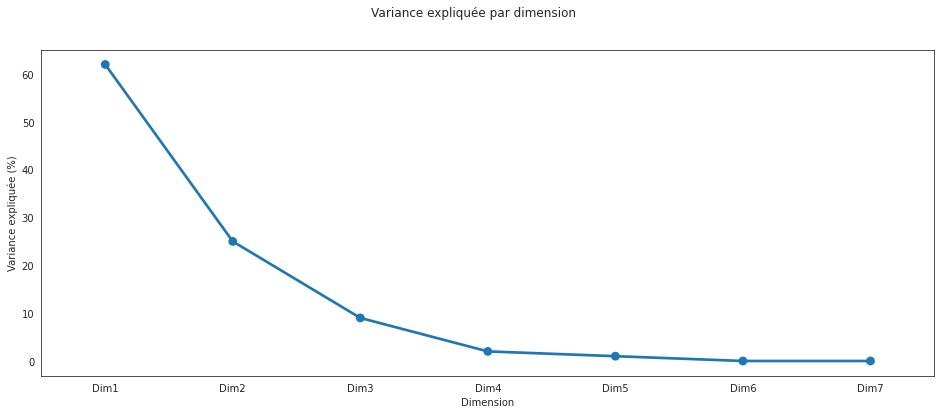

In [334]:
plt.figure(figsize=(16, 6))
g_eig_puissance = seaborn.pointplot(x = "Dimension", 
                          y = "% variance expliquée",
                          data = eig_puissance)
g_eig_puissance.set(ylabel = "Variance expliquée (%)")
g_eig_puissance.figure.suptitle("Variance expliquée par dimension")

plt.show()

In [335]:
coordvar_puissance = pca_puissance.components_.T * np.sqrt(pca_puissance.explained_variance_)
coordvar_df_puissance = pandas.DataFrame(coordvar_puissance, columns=['PC'+str(i) for i in range(1, 8)], index=puis_bis2.columns[:7])
coordvar_df_puissance 

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
P1 : ]0 - 3] kW,0.889105,0.400919,-0.034673,-0.067633,-0.197834,0.068004,0.000000e+00
P2 : ]3 - 9] kW,0.912006,0.255392,0.083475,-0.289224,0.111178,-0.028722,1.392240e-32
P3 : ]9 - 100] kW,0.941688,0.216625,0.150240,0.155726,-0.039074,-0.136864,-2.819240e-32
P4 : ]100 - 250] kW,0.891381,0.379498,0.014304,0.191666,0.129471,0.092206,1.487901e-32
P5 : ]250 - 1000] kW,-0.328648,0.678306,-0.656519,0.001894,0.017389,-0.036781,-6.589978e-33
P6 : ]1000 - 12000] kW,-0.686891,0.661477,0.302300,-0.005121,-0.001167,-0.000245,-3.183923e-17
P7 : > 12000 kW,-0.686891,0.661477,0.302300,-0.005121,-0.001167,-0.000245,3.183923e-17


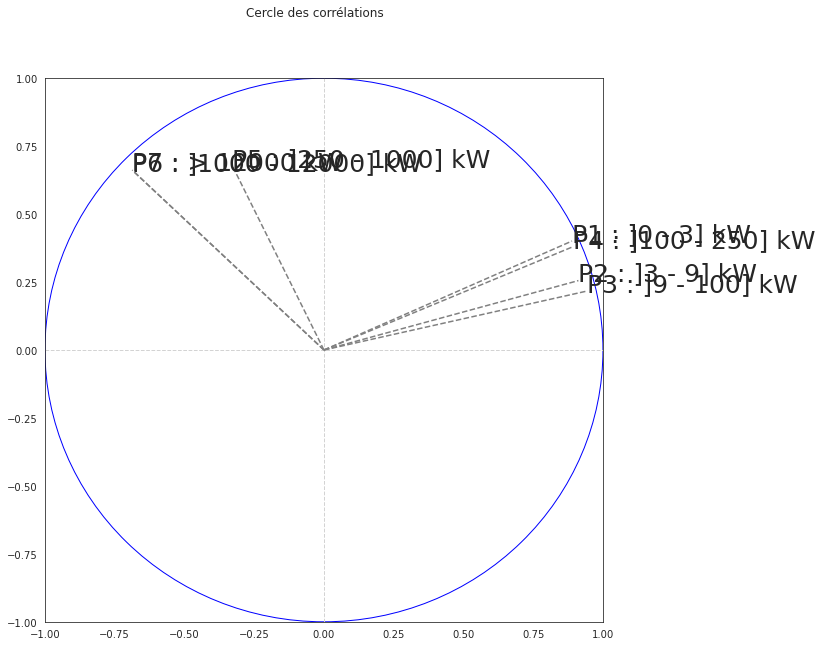

In [336]:
fig, axes = plt.subplots(figsize = (10, 10))
fig.suptitle("Cercle des corrélations")
axes.set_xlim(-1, 1)
axes.set_ylim(-1, 1)
axes.axvline(x = 0, color = 'lightgray', linestyle = '--', linewidth = 1)
axes.axhline(y = 0, color = 'lightgray', linestyle = '--', linewidth = 1)
for j in range(7):
    axes.text(coordvar_df_puissance["PC1"][j],coordvar_df_puissance["PC2"][j], coordvar_df_puissance.index[j], size = 25)
    axes.plot([0,coordvar_df_puissance["PC1"][j]], [0,coordvar_df_puissance["PC2"][j]], color = "gray", linestyle = 'dashed')
plt.gca().add_artist(plt.Circle((0,0),1,color='blue',fill=False))

plt.show()

**Interpretation**

Nous pouvons déduire par de graphe que:

-L'axe des abscisses représente le premier axe d'inertie.

-Les variables P5, P6, P7 sont proches du 2ème axe et elles sont corrélées négativement par rapport au 2ème axe. 

-Les variables P1, P4, P2 et P3 sont proches du premier axe factoriel, elles sont  corrélées positivement.


In [337]:
data_pca2 = pca.transform(puis_bis[puis_bis.columns[:7]])
data_pca_df2 = pandas.DataFrame({
    "Dim1" : data_pca2[:,0], 
    "Dim2" : data_pca2[:,1], 
    "date" : prod["date"].unique()
})
data_pca_df.head() 

/home/razafimanjato/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


,Dim1,Dim2,date
0,2.246669,-2.154152,2018-01-01
1,1.508401,-2.175757,2018-01-02
2,2.188573,-2.612871,2018-01-03
3,2.133976,-2.189752,2018-01-04
4,0.989093,-1.728741,2018-01-05


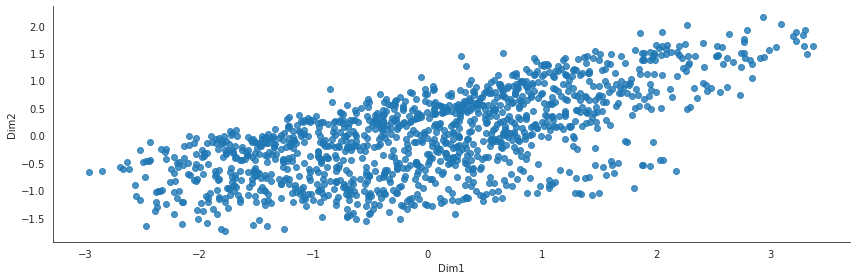

In [338]:
g_pca2 = seaborn.lmplot(x = "Dim1", y = "Dim2", data = data_pca_df2, fit_reg = False, 
                       height = 4, aspect = 3)
g_pca.set(xlabel = "Dimension 1 (62%)", ylabel = "Dimension 2 (25 %)")
g_pca.fig.suptitle("Premier plan factoriel")

plt.show()

**comparaison selon le mois**

In [339]:
puissance_pca_month = pca.transform(puis_bis2[puis_bis2.columns[:7]])
puissance_pca_df_month = pandas.DataFrame({
    "Dim1" : puissance_pca_month[:,0], 
    "Dim2" :puissance_pca_month[:,1], 
    "month" : month
})
puissance_pca_df_month.head()

/home/razafimanjato/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


,Dim1,Dim2,month
0,-1.564823,0.353253,Janvier
1,-1.778979,-0.341122,Janvier
2,-1.793811,0.316480,Janvier
3,-1.922411,0.128729,Janvier
4,-1.876794,-0.757055,Janvier


**Représentation des tracés sur un plan en 2D**

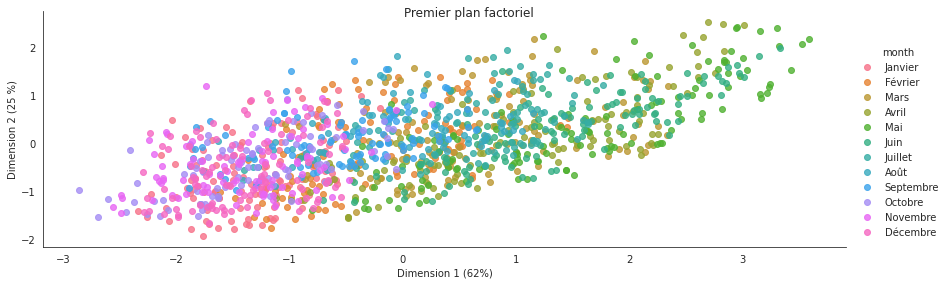

In [340]:
g_puissancepca_month = seaborn.lmplot(x = "Dim1", y = "Dim2", hue = "month", data = puissance_pca_df_month, fit_reg = False, 
                       height = 4, aspect = 3)
g_puissancepca_month.set(xlabel = "Dimension 1 (62%)", ylabel = "Dimension 2 (25 %)")
g_puissancepca_month.fig.suptitle("Premier plan factoriel")

plt.show()

Ce graphique nous montre que :

-Les mois: Octobre, novembre , Décembre, Janvier les points sont plus regroupées à gauche du graphe.

-Nous retrouvons plus à droite du graphe les mois avril, mai, juin.


Nous pouvons supposer que durant les mois **Octobre, novembre , Décembre, Janvier** ont une forte puissance contrairement aux mois de **avril, mai, juin** qui ont faible de puissance.

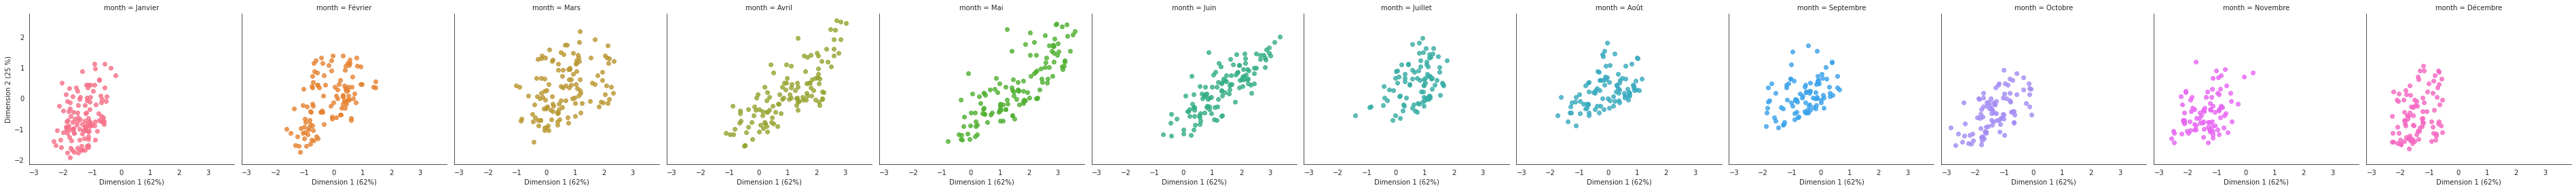

In [341]:


g_puissancepca2_month = seaborn.lmplot(x = "Dim1", y = "Dim2", hue = "month", col = "month", 
                        data = puissance_pca_df_month, fit_reg = False,
                        height = 4, aspect = 1.1)
g_puissancepca2_month.set(xlabel = "Dimension 1 (62%)", ylabel = "Dimension 2 (25 %)")
g_puissancepca_month.fig.suptitle("Premier plan factoriel")

plt.show()

**Interpretation**

Ce graphique nous montre que :

-Pour certains mois: Septembre, Octobre, novembre, décembre, Janvier, Juillet, Aout les points sont concentrés entre eux.

-Pour les mois: Mars, Avril, Mai et Juin les observations sont assez éloignés

**Classification avec CAH**

Une analyse avec la CAH pour la plage de puissance injection 

In [342]:
hac2 = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
hac2.fit(scale(puis_bis))

AgglomerativeClustering(distance_threshold=0, n_clusters=None)

In [343]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_, counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

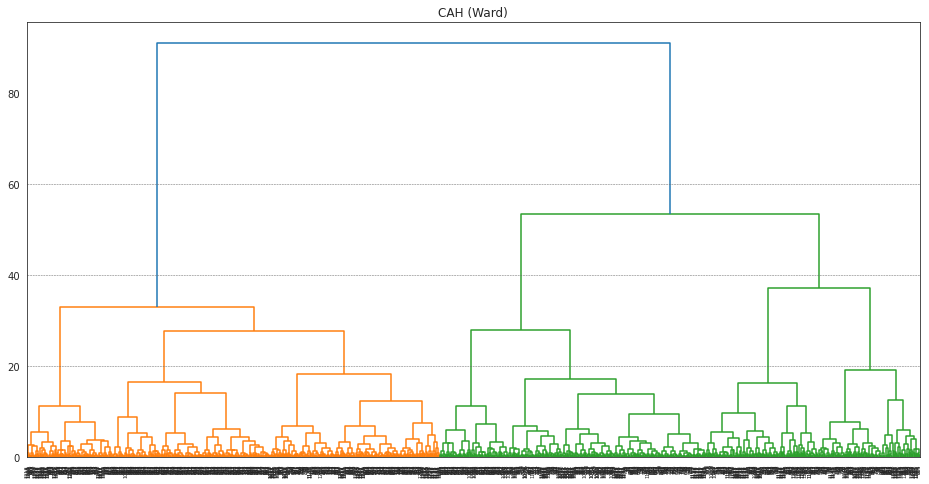

In [344]:
plt.figure(figsize = (16, 8))
plt.title("CAH (Ward)")
plot_dendrogram(hac2)
plt.axhline(y = 60, linewidth = .5, color = "dimgray", linestyle = "--")
plt.axhline(y = 40, linewidth = .5, color = "dimgray", linestyle = "--")
plt.axhline(y = 20, linewidth = .5, color = "dimgray", linestyle = "--")
plt.show()

**Interprétation**

Ce graphe nous montre que nous pouvons prendre soit 2 classes soit 3 classes ou 7 classes par exemples.

Nous pouvons déduire que la plage de puissance injection varie selon les mois. Certains mois se comporte de la même façon que d'autres. 

Par exemple, pour les mois de Septembre, Octobre, Novembre, Décembre et Janvier nous remarquons les observations sont plus concentrées entre eux.Nous pouvons donc supposer qu'en automne et en hiver nous avons plus de puissance.


Nous pouvons imaginer que la plage de puissance injection peut varier selon les saisons. 


## 4- Conclusion

Cette  etude  nous a permis de conclure que nous avons des observations qui sont corrélées entre eux surtout pour les mois d'avril, mai, juin et pour les mois d'Octobre, Novembre, Décembre, Janvier. 

L'analyse la filière de production et de la plage de puissance est plus interpretable en fonction des mois. Cette étude nous a permis de voir les observations qui sont groupées entre eux. 

Nous pouvons conclure que pour la puissance injection et la filière de production, les observations sont corrélées entre eux en Hiver (Octobre, Novembre, Décembre, Janvier), et en été (Avril, Mai, Juin).

Nous pouvons faire l'étude aussi en fonction des saisons au lieu des mois pour vérifier cette conclusion.

Nous pouvons également faire un K-means sur l'ACP.